In [23]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
warnings.filterwarnings('ignore')


In [2]:
trans = pd.read_csv('transaction_data.csv')

Проверим размер таблицы, типы переменных, число пропущенных значений и описательную статистику

In [3]:
trans

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


In [4]:
trans.shape

(5315, 3)

In [5]:
trans.dtypes

date           object
name           object
transaction    object
dtype: object

In [6]:
# Проверим пропуски
trans.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [7]:
# Описательная статистика 
trans.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


Посмотрим, какие значения находятся в колонке transaction и сколько наблюдений относятся к тому или иному уровню 
Визуализируем результат с помощью барплота

In [8]:
count_trans = trans.transaction.value_counts()
count_trans

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

<AxesSubplot:ylabel='transaction'>

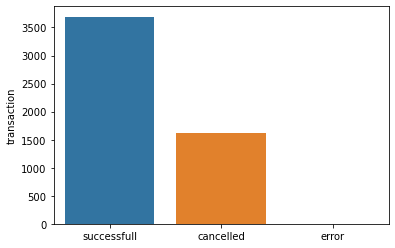

In [9]:
sns.barplot(x=count_trans.index, y=count_trans)

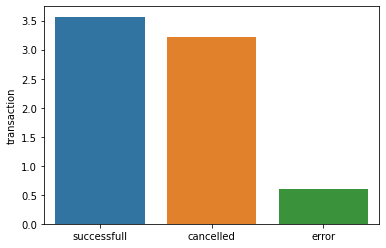

In [12]:
# Попробуем улучшить график с помощью логарифмирования

import numpy as np

ax = sns.barplot(x=trans['transaction'].value_counts().index, y=np.log10(count_trans))

Посчитаем, сколько успешных транзакций осуществил каждый из пользователей.
Построем гистограмму распределения числа успешных транзакций

In [13]:
suc_trans = trans.query('transaction == "successfull"').groupby('name').agg({'transaction': 'count'})

<AxesSubplot:ylabel='Count'>

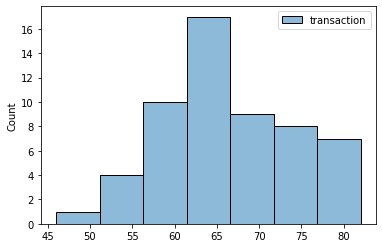

In [14]:
sns.histplot(data=suc_trans)

Добавим обновленные данные (transaction_data_updated.csv).
Построим сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, 
строк – минуты, значений – число совершенных операций в указанную минуту.
Пропущенные значения заполним нулями

In [15]:
upd_trans = pd.read_csv('transaction_data_updated.csv')

In [16]:
upd_trans

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [17]:
upd_trans.groupby(['name', 'minute']).agg({'date': 'count'})

date
name               minute      
Ekaterina_Fedorova 0          3
                   1          4
                   2          1
                   3          3
                   4          3
...                         ...
Vasilisa_Smirnova  52         1
                   53         1
                   54         2
                   56         3
                   58         1

[2578 rows x 1 columns]

In [18]:
user_vs_minute_pivot = upd_trans.groupby(['name', 'minute'], as_index=False) \
                                .agg({'date': 'count'}) \
                                .rename(columns={'date': 'trans_quantity'})

user_vs_minute_pivot

,name,minute,trans_quantity
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3
...,...,...,...
2573,Vasilisa_Smirnova,52,1
2574,Vasilisa_Smirnova,53,1
2575,Vasilisa_Smirnova,54,2
2576,Vasilisa_Smirnova,56,3


In [19]:
user_vs_minute_pivot = user_vs_minute_pivot.pivot(index='minute', columns='name', values='trans_quantity')

In [20]:
user_vs_minute_pivot.fillna(0, inplace=True)

In [22]:
user_vs_minute_pivot[:5]

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


<AxesSubplot:xlabel='minute'>

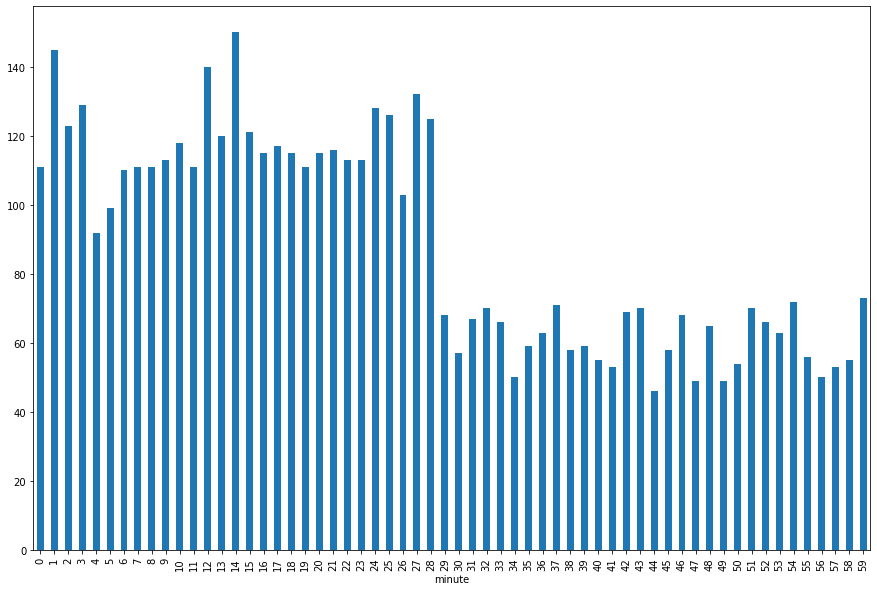

In [31]:

user_vs_minute_pivot.sum(axis=1).plot.bar(figsize=(15, 10))

Проблема с минутами, если прошло больше часа то не учитывалось время часовое, а только минутное

In [33]:
# Конвертируем дату в формат datetime
upd_trans['date'] = pd.to_datetime(upd_trans.date)

In [34]:
# Посчитаем сколько минут прошло с начала дня
upd_trans['true_minute'] = upd_trans.date.dt.minute + upd_trans.date.dt.hour * 60

In [35]:
upd_trans

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


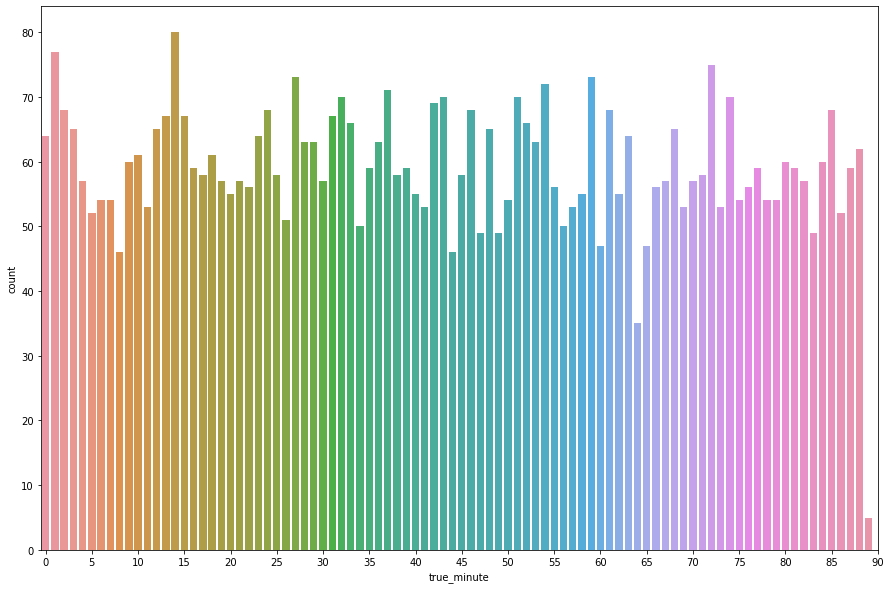

In [44]:
plt.figure(figsize=(15, 10))

ticks = [num for num in range(0, 95, 5)]
sns.countplot(upd_trans.true_minute)
true_minute=plt.xticks(ticks=ticks, labels=ticks)